In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import linear_model

In [2]:
# Load the weekly.csv dataset.
file_path = 'Resources/weekly_sales_complete.csv'
sales_df = pd.read_csv(file_path)
sales_df.columns = sales_df.columns.str.replace(' ','_')
sales_df.columns

Index(['Item', 'Item_Code', 'Quantity', 'Unit_Price', 'Total_Sales_Amount',
       'date'],
      dtype='object')

In [3]:
sales_df.describe()

,Item_Code,Quantity,Unit_Price,Total_Sales_Amount
count,23846.000000,23846.000000,23846.000000,23846.000000
mean,3221.302944,11.079636,5.147705,55.500769
std,278.452809,17.737029,4.944210,101.401739
min,2696.000000,1.000000,0.000000,0.000000
25%,3113.000000,2.000000,3.000000,7.000000
50%,3234.000000,5.000000,4.304952,20.500000
75%,3452.000000,13.000000,7.000000,65.000000
max,3717.000000,293.000000,206.000000,5974.000000


In [36]:
X = np.array(pd.to_datetime(sales_df['date'].dropna().index.values), dtype=float).reshape(-1, 1)
y = np.array(sales_df[['Total_Sales_Amount']]).reshape(-1, 1)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(y_train)
print(y_pred)

[[56.29319219]
 [56.2875837 ]
 [56.29382952]
 ...
 [56.29344712]
 [56.29217247]
 [56.27306663]]


In [8]:
model.score(X_test, y_test)

-0.00034190825936120106

In [9]:
model.score(X_train, y_train)

9.014924414985082e-05

In [10]:
model.coef_

array([[-0.00012747]])

In [11]:
model.intercept_

array([56.29599644])

C:\Users\Rica6\anaconda3\envs\PythonData\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

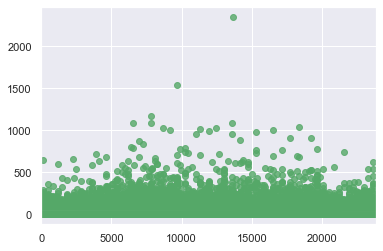

In [12]:

sns.set_theme(color_codes=True)
sns.regplot(X_train, y_train,  color="g")

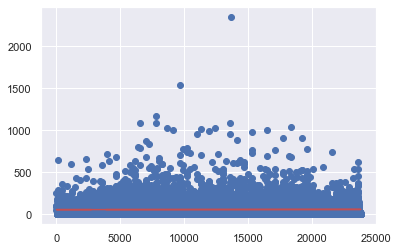

In [42]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 56.948 + 0.0001*X_train, 'r')
plt.show()

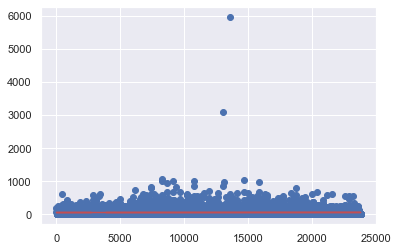

In [43]:
plt.scatter(X_test, y_test)
plt.plot(X_train, 56.948 + 0.0001*X_train, 'r')
plt.show()